In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
gender_data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
%config IPCompleter.greedy=True

In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Checking data for null obejcts + summing them up
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Check the survival rate by analyzing CATEGORICAL (sex)data. Later on also ordinal and continuous (age) features 
sexsurv = data.groupby(['Sex', 'Survived'])['Survived'].count()
pclasssurv = data.groupby(['Pclass', 'Survived'])['Survived'].count()

print(sexsurv)
print('')
print(pclasssurv)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


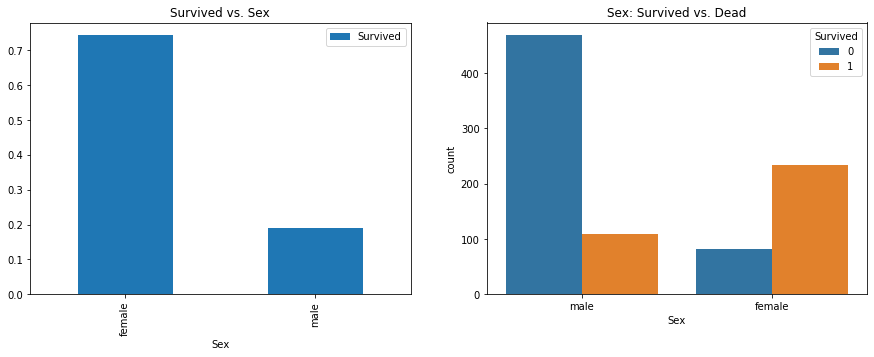

In [9]:
# Plotting the survival rate

f,ax=plt.subplots(1,2,figsize=(15,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

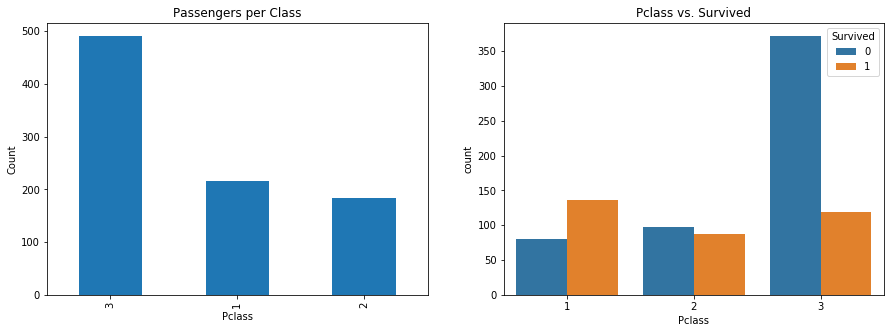

In [10]:
# Number of survived per Pclass and sex. 
# Class3 - expensive. Class1 - low budget. 0 - Dead. 1 - Survived.

f,ax=plt.subplots(1,2, figsize=(15,5))

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass vs. Survived')

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Passengers per Class')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')
plt.show()

In [11]:
# Crosstab for simple cross tabulation on 2+ factors/parameters. Here: Sex, survived and Pclass

pd.crosstab(index=[data.Sex, data.Survived], columns=data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

D:\Apps\Anaconda\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


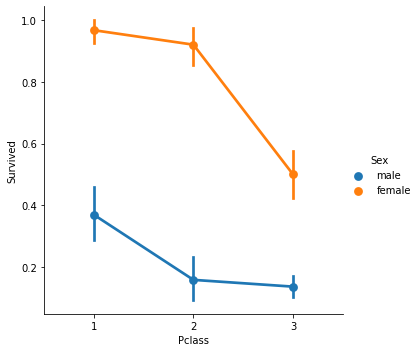

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

In [13]:
# Check the survival rate by analyzing CONTINOUS (age) data

print('Age of oldest: ', data['Age'].max())
print('Age of youngest: ', data['Age'].min())
print('Age in average: ', data['Age'].mean())

Age of oldest:  80.0
Age of youngest:  0.42
Age in average:  29.69911764705882


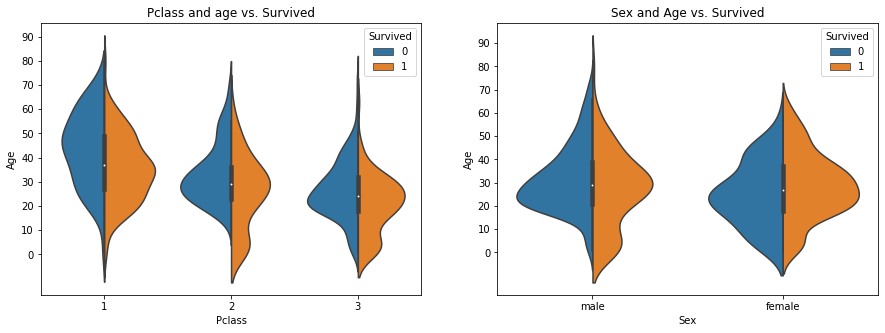

In [14]:
# Printing violin plot
# Pclass --> x. Age --> y. PDF --> survived or not.

f,ax=plt.subplots(1,2, figsize=(15,5))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and age vs. Survived')
ax[0].set_yticks(range(0, 100, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

In [15]:
# Next step: replace 177 null values from the age column for better representation 
# Looking for titles and extracting them 

data['Titles']=0
for x in data:
    data['Titles']=data.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(data.Titles, data.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Titles,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [16]:
data['Titles'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.groupby('Titles')['Age'].mean()

Titles
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64